# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [20]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `~/Local/Coding Projects/BEE4570_mine/hw1-rizfre`


Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [21]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings

In [22]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

In [23]:
function minimum(array)
    min_value = 0
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 0


Solution to Problem 1.1: 

The issue was that the initial minimum value used in the function (`min_value = 0`) is already a relatively "smaller" value. By changing the default minimum value to infinity, the if/else logic now works. 


In [24]:
# Fixed Problem 1.1

function minimum(array)
    min_value = Inf
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

In [25]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show average_grade;

UndefVarError: UndefVarError: `average_grade` not defined

Solution to Problem 1.2:

1. Needed add `using Statistics` so that Julia understood what `mean()` was
2. Edited last line... `@show average_grade;` was referencing a variable inside the function and did not itself call the function. Edited line (`@show class_average(student_grades))`) calls the function properly and passes in the `student_grades` array.

In [26]:
# Fixed code for Problem 1.2

using Statistics

student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(student_grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

In [27]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1_000
outcomes = zero(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end

win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

MethodError: MethodError: no method matching setindex!(::Int64, ::Bool, ::Int64)

Solution for Problem :

Small error in the line assigning `outcomes` initially-- `zero()` corrected to `zeros()`

In [28]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end

n_trials = 1_000
outcomes = zeros(n_trials)
for i = 1:n_trials
    outcomes[i] = (sum(passadieci()) > 11)
end

win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.382


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [29]:
function mystery_function(values)
    y = []
    for v in values
        if !(v in y)
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);


mystery_function(list_of_values) = Any[1, 2, 3, 4]


Solution to Problem 2:

`mystery_function` finds the unique elements in an array and returns an array continaing those unique elements.

The built-in function that does the same thing is `unique()`

In [30]:
function find_unique(values)
    # this function finds the unique elements in the passed in array
    y = []
    for v in values
        if !(v in y)
            # add value v to list of unique elements
            append!(y, v)
        end
    end
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);

# Built-in function
@show unique(list_of_values)


mystery_function(list_of_values) = Any[1, 2, 3, 4]
unique(list_of_values) = [1, 2, 3, 4]


4-element Vector{Int64}:
 1
 2
 3
 4

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.



In [51]:
# Solution to Problem 3

function compute_mean(v)
    # Function computes mean of vector v
    my_sum = 0
    for i in v
        my_sum = my_sum + i
    end
    v_mean = my_sum / length(v)

    # round for machine precision
    v_mean = round(v_mean, digits=5)

    return v_mean
end

random_vect = rand(10)

# Calculate the random vector's mean
vect_mean = compute_mean(random_vect)

# Subtraction without loop
new_vect = random_vect .- vect_mean

@show compute_mean(new_vect)


compute_mean(new_vect) = 0.0


0.0

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

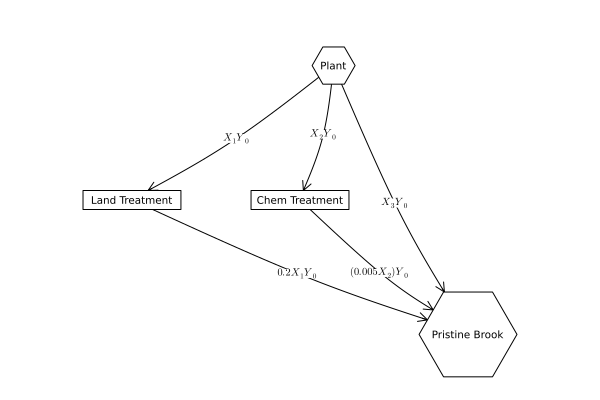

In [48]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"X_1Y_0", (1,3) => L"X_2Y_0", (1, 4) => L"X_3Y_0",(2, 4) => L"0.2X_1Y_0",(3, 4) => L"(0.005X_2)Y_0")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

**SOLUTION to Problem 4**

The function `return_price_yuk` below takes two inputs, the volume of water per day sent to land treatment (`x1`) and chem treatment (`x2`). in the function, the price is calculated using the given equations for cost as function of `x1` and `x2`. It was assumed that it was "free" to use method 3, no treatment. The total daily YUK discharged from each method was calculated using the given equations as well. 

For land treatment, 20% removal of YUK means that the effluent concentration would be 0.2 times the influent concentration. The influent concentration is $y_0$, so $0.2 \times y_0$ is the factor to multiply incoming volumes (`x1`) by for the total YUK discharged. For method 2, chemical treatment, the term to multiply ($y0 \times x_2$) by was given as $e=1-0.005(x_2)$.

The plot was a little difficult to develop due to the many variables, but what I came up with was `x1` on the x-axis, and two different y axes for price and YUK. The test values I chose resulted in there being multiple outcomes for a given `x1` since `x2` and `x3` could vary, which makes interpreting it not so easy. 

Inspecting the graph and checking the results of the function showed that `x1=70, x2=30, x3=0` resulted in a YUK output of $18.5$ kg/day and a cost of $290 which meets the regulation requirements. 


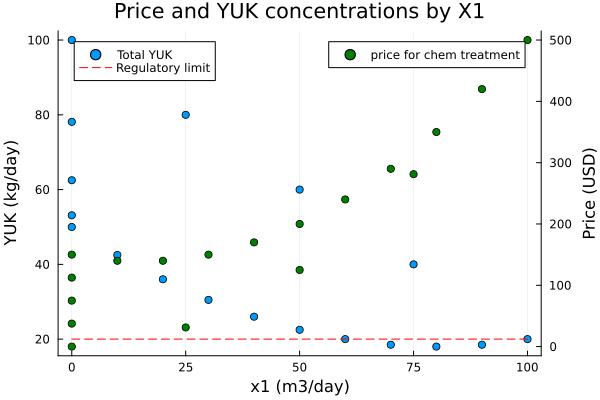

In [60]:
# Code for Problem 4

function return_price_yuk(x1, x2)
    # determine x3 from given x1, x2, assuming 100 m3/day must be the sum
    x3 = 100 - x1 - x2

    # initial yuks, for if/else branch
    met1 = 0
    met2 = 0

    # calculate price
    price = (x1^2)/20 + x2*1.5

    # calculate yuk
    if x1 > 0
        met1 = 0.2 * x1 * 1
    end
    if x2 > 0
        met2 = (1- (1-0.005*x2)) * 1 * x2
    end
    raw = x3 * 1
    yuk = met1+met2+raw

    return (price, yuk)
end

# Create test x1s, x2s, assuming they must sum with x3 to 100 m3/day
x1s = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 0, 0, 0, 0, 25, 50, 75]
x2s = [100, 90, 80, 70, 60, 50, 40, 30, 20, 10, 0, 0, 25, 50, 75, 0, 0, 0]

output = return_price_yuk.(x1s, x2s)

prices = [out[1] for out in output]
yuks = [out[2] for out in output]

# Plot results
using Plots
scatter(x1s, yuks, label="Total YUK", legend=:topleft, xlabel="x1 (m3/day)", ylabel="YUK (kg/day)",title="Price and YUK concentrations by X1")
plot!([0, 100], [20, 20], label="Regulatory limit", linestyle=:dash, seriescolor=:red)
scatter!(twinx(), x1s, prices, label="price for chem treatment", color="green", legend=:topright,ylabel="Price (USD)")

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

List any external references consulted, including classmates.